In [1]:
import pylaeoclim_leeds.hadcm3_processing as hcm3
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# Weighted mean and sum

**GOAL**: update the *get* method from GeoDataArray to propose a weighted mean over the coordinates (both time and space).

**IDEA**: simply multiply the volume matric to the value along the remaining coordinates

In [2]:
ts = hcm3.MERIDATS('xoupb', 2000, 2100)
ts

__ Importation of <class 'pylaeoclim_leeds.hadcm3_processing.MERIDATS'> : xoupb between years 2000 and 2100.
Time elapsed for open_dataset : 0.05429220199584961
Time elapsed for crop start year : 0.535546064376831
Time elapsed for crop start and end years : 0.6050765514373779
Time elapsed for crop start and end years and months : 0.6051645278930664
____ Import succeeded.
____ Coordinates imported in the HadCM3DS dataset.


None; None
None; None
None; None
lat: [-88.75; -87.5; ...; 87.5; 88.75; 143]; lat_p: [-88.75; -87.5; ...; 88.75; 90.0; 144]
latb: [-89.375; -88.125; ...; 88.125; 89.375; 144]; latb_p: [-89.375; -88.125; ...; 89.375; 90.625; 145]
lats: [1.25; 1.25; ...; 1.25; 1.25; 143]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-5500.099609375; -4884.7998046875; ...; -10.0; -0.0; 21]; z_p: [-5500.099609375; -4884.7998046875; ...; -10.0; -0.0; 21]
zb: [-5807.74951171875; -5192.44970703125; ...; -5.0; 5.0; 22]; zb_p: [-5807.74951171875; -5192.44970703125; ...; -5.0; 5.0; 22]
zs: [615.2998046875; 615.2998046875; ...; 10.0; 10.0; 21]; zs_p: [615.2998046875; 615.2998046875; ...; 10.0; 10.0; 21]
t: [2000-06-01 00:00:00; 2001-06-01 00:00:00; ...; 2099-06-01 00:00:00; 2100-06-01 00:00:00; 101]
DATA: <xarray.Dataset>
Dimensions:         (depth: 21, latitude: 143, t: 101)
Coordinates:
  * depth           (depth) float32 -0.0 -10.0 -20.0 ... -4884.8 -5500.0996
  * latitude        (latitude) float32 -88.75 -8

In [3]:
amoc = ts.atlantic()
amoc

__ Importing meridional Overturning Stream Function (Atlantic).
____ Coordinate imported in the GeoDataArray instance.


None; None
None; None
None; None
lat: [-88.75; -87.5; ...; 87.5; 88.75; 143]; lat_p: [-88.75; -87.5; ...; 88.75; 90.0; 144]
latb: [-89.375; -88.125; ...; 88.125; 89.375; 144]; latb_p: [-89.375; -88.125; ...; 89.375; 90.625; 145]
lats: [1.25; 1.25; ...; 1.25; 1.25; 143]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-5500.099609375; -4884.7998046875; ...; -10.0; -0.0; 21]; z_p: [-5500.099609375; -4884.7998046875; ...; -10.0; -0.0; 21]
zb: [-5807.74951171875; -5192.44970703125; ...; -5.0; 5.0; 22]; zb_p: [-5807.74951171875; -5192.44970703125; ...; -5.0; 5.0; 22]
zs: [615.2998046875; 615.2998046875; ...; 10.0; 10.0; 21]; zs_p: [615.2998046875; 615.2998046875; ...; 10.0; 10.0; 21]
t: [2000-06-01 00:00:00; 2001-06-01 00:00:00; ...; 2099-06-01 00:00:00; 2100-06-01 00:00:00; 101]
DATA: <xarray.DataArray 'Merid_Atlantic' (t: 101, z: 21, latitude: 143)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [       

In [4]:
amoc_mean = ts.atlantic(mode_lat="mean", mode_z="mean")
amoc_mean

__ Importing meridional Overturning Stream Function (Atlantic).
____ Coordinate imported in the GeoDataArray instance.


None; None
None; None
None; None
None; None
None; None
None; None
None; None
None; None
None; None
t: [2000-06-01 00:00:00; 2001-06-01 00:00:00; ...; 2099-06-01 00:00:00; 2100-06-01 00:00:00; 101]
DATA: <xarray.DataArray 'Merid_Atlantic' (t: 101)>
array([4.410141 , 4.103878 , 4.2380023, 4.405623 , 4.418791 , 3.9882195,
       4.2376537, 4.1997967, 4.486809 , 4.552729 , 4.334927 , 4.3688955,
       4.6297565, 4.5334215, 4.3423247, 4.850699 , 4.429485 , 4.2127523,
       4.338864 , 4.247538 , 4.576664 , 4.58164  , 4.917033 , 4.8509455,
       4.6157575, 4.1612372, 4.502931 , 4.6978974, 4.727572 , 4.7466745,
       4.7082543, 4.640424 , 4.665263 , 4.2622495, 4.5378294, 4.943328 ,
       5.0673347, 4.7967095, 4.738744 , 4.8503733, 4.6750216, 4.751567 ,
       5.1949472, 5.069712 , 4.9679327, 4.696718 , 5.1114445, 5.152445 ,
       5.0793896, 4.868828 , 5.019577 , 4.950283 , 5.0382137, 5.126031 ,
       4.8783216, 5.105747 , 5.2939506, 5.3629265, 5.2386513, 5.1711392,
       5.0016894, 5.11

In [5]:
lat_weights = np.cos(np.deg2rad(ts.data.latitude))
lat_weights

<xarray.DataArray 'latitude' (latitude: 143)>
array([0.02181496, 0.04361945, 0.06540319, 0.0871558 , 0.10886693,
       0.13052624, 0.15212344, 0.17364822, 0.19509035, 0.21643965,
       0.23768592, 0.25881907, 0.27982903, 0.30070582, 0.32143947,
       0.34202015, 0.36243805, 0.38268343, 0.40274668, 0.42261824,
       0.44228867, 0.4617486 , 0.48098874, 0.49999997, 0.5187732 ,
       0.5372996 , 0.55557024, 0.57357645, 0.59130967, 0.6087614 ,
       0.62592345, 0.6427876 , 0.6593458 , 0.6755902 , 0.69151306,
       0.70710677, 0.72236395, 0.7372773 , 0.7518398 , 0.7660445 ,
       0.7798845 , 0.7933533 , 0.8064446 , 0.81915206, 0.8314696 ,
       0.8433914 , 0.85491186, 0.86602545, 0.87672675, 0.8870109 ,
       0.89687276, 0.9063078 , 0.91531146, 0.92387956, 0.93200785,
       0.9396926 , 0.9469301 , 0.953717  , 0.96004987, 0.9659258 ,
       0.9713421 , 0.976296  , 0.98078525, 0.9848077 , 0.98836154,
       0.9914449 , 0.99405634, 0.9961947 , 0.99785894, 0.99904823,
       0.999762  , 1.        , 0.999762  , 0.99904823, 0.99785894,
       0.9961947 , 0.99405634, 0.9914449 , 0.98836154, 0.9848077 ,
       0.98078525, 0.976296  , 0.9713421 , 0.9659258 , 0.96004987,
       0.953717  , 0.9469301 , 0.9396926 , 0.93200785, 0.92387956,
       0.91531146, 0.9063078 , 0.89687276, 0.8870109 , 0.87672675,
       0.86602545, 0.85491186, 0.8433914 , 0.8314696 , 0.81915206,
       0.8064446 , 0.7933533 , 0.7798845 , 0.7660445 , 0.7518398 ,
       0.7372773 , 0.72236395, 0.70710677, 0.69151306, 0.6755902 ,
       0.6593458 , 0.6427876 , 0.62592345, 0.6087614 , 0.59130967,
       0.57357645, 0.55557024, 0.5372996 , 0.5187732 , 0.49999997,
       0.48098874, 0.4617486 , 0.44228867, 0.42261824, 0.40274668,
       0.38268343, 0.36243805, 0.34202015, 0.32143947, 0.30070582,
       0.27982903, 0.25881907, 0.23768592, 0.21643965, 0.19509035,
       0.17364822, 0.15212344, 0.13052624, 0.10886693, 0.0871558 ,
       0.06540319, 0.04361945, 0.02181496], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 -88.75 -87.5 -86.25 -85.0 ... 86.25 87.5 88.75

In [6]:
amoc_weights = amoc.data.weighted(lat_weights)
amoc_weights

DataArrayWeighted with weights along dimensions: latitude

In [7]:
weighted_mean = amoc_weights.mean(("latitude"))
weighted_mean

<xarray.DataArray (t: 101, z: 21)>
array([[-1.3465316 ,  3.9340081 ,  3.1002667 , ...,  1.4736515 ,
         0.8101102 ,  0.        ],
       [-1.4839709 ,  3.685575  ,  2.8709915 , ...,  1.3072295 ,
         0.72966015,  0.        ],
       [-0.8723826 ,  4.1878514 ,  3.3257413 , ...,  1.193232  ,
         0.66000026,  0.        ],
       ...,
       [-1.5614756 ,  2.988369  ,  1.925491  , ...,  1.3763604 ,
         0.77169985,  0.        ],
       [-1.8215705 ,  2.974483  ,  1.9427137 , ...,  1.1935499 ,
         0.66898984,  0.        ],
       [-1.5313075 ,  3.522521  ,  2.6652472 , ...,  1.255047  ,
         0.6870132 ,  0.        ]], dtype=float32)
Coordinates:
  * t        (t) object 2000-06-01 00:00:00 ... 2100-06-01 00:00:00
  * z        (z) float32 -5500.0996 -4884.8 -4269.5 -3654.3 ... -20.0 -10.0 -0.0

In [8]:
z_weights = xr.DataArray(amoc.zs, dims=["z"])
z_weights

<xarray.DataArray (z: 21)>
array([615.29980469, 615.29980469, 615.25      , 615.25      ,
       615.25      , 615.25      , 615.29992676, 505.29998779,
       329.24993896, 219.25006104, 146.04998779,  97.29998779,
        64.80001831,  43.1499939 ,  28.75      ,  19.15000153,
        12.75      ,  10.09999847,  10.        ,  10.        ,
        10.        ])
Dimensions without coordinates: z

In [9]:
amoc_weights_2 = weighted_mean.weighted(z_weights)
amoc_weights_2

DataArrayWeighted with weights along dimensions: z

In [10]:
weighted_mean_2 = amoc_weights_2.mean(("z"))
weighted_mean_2

<xarray.DataArray (t: 101)>
array([4.35294009, 3.89781818, 4.20195335, 4.52668633, 4.51000067,
       3.83418234, 4.41121251, 4.34771951, 4.87189609, 4.64539677,
       4.32696012, 4.37809819, 4.72579604, 4.5600973 , 4.44515451,
       5.36424046, 4.47202233, 4.19730996, 4.46788591, 4.1332826 ,
       4.78078387, 4.64160788, 5.3223459 , 5.12781094, 4.86019929,
       3.98914126, 4.54911305, 4.83231361, 4.89519409, 5.0387471 ,
       4.95441263, 4.78756643, 4.75449345, 4.00270401, 4.67412274,
       5.49087241, 5.69680533, 5.25143095, 5.12502546, 5.30860308,
       4.90362129, 4.89081947, 5.65106722, 5.53512899, 5.44640458,
       4.9756878 , 5.68863443, 5.88395537, 5.7800519 , 5.33138   ,
       5.43441509, 5.49229753, 5.61640869, 5.53656945, 4.99828279,
       5.37344945, 5.98382267, 6.13937541, 5.8106014 , 5.65617567,
       5.28425584, 5.70565344, 5.39030472, 5.72188137, 6.17926092,
       5.6875486 , 6.09981251, 6.14105741, 5.98381027, 5.87107425,
       5.55068185, 5.50119022, 5.53553839, 5.58283101, 5.86793749,
       5.8260433 , 5.98588883, 5.33688788, 6.10878603, 6.37880131,
       5.47763203, 6.16488387, 6.16393245, 6.27444501, 6.48361851,
       6.05520455, 6.5464754 , 6.18612284, 6.18089751, 6.03571311,
       6.12228353, 6.23268793, 6.31624813, 6.81763023, 7.16730057,
       6.5885218 , 5.92980873, 6.3626335 , 5.39723697, 5.60986805,
       6.34261368])
Coordinates:
  * t        (t) object 2000-06-01 00:00:00 ... 2100-06-01 00:00:00

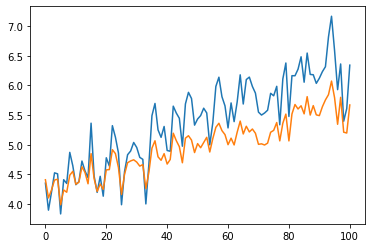

In [11]:

plt.plot(weighted_mean_2)
plt.plot(amoc_mean.values())

In [12]:
amoc_test = ts.atlantic(mode_lat="weighted_mean", mode_z="weighted_mean")
amoc_test

__ Importing meridional Overturning Stream Function (Atlantic).
____ Coordinate imported in the GeoDataArray instance.
**** Mode wasn't recognized. The data_array was not changed.
**** Mode wasn't recognized. The data_array was not changed.


None; None
None; None
None; None
lat: [-88.75; -87.5; ...; 87.5; 88.75; 143]; lat_p: [-88.75; -87.5; ...; 88.75; 90.0; 144]
latb: [-89.375; -88.125; ...; 88.125; 89.375; 144]; latb_p: [-89.375; -88.125; ...; 89.375; 90.625; 145]
lats: [1.25; 1.25; ...; 1.25; 1.25; 143]; lats_p: [1.25; 1.25; ...; 1.25; 1.25; 144]
z: [-5500.099609375; -4884.7998046875; ...; -10.0; -0.0; 21]; z_p: [-5500.099609375; -4884.7998046875; ...; -10.0; -0.0; 21]
zb: [-5807.74951171875; -5192.44970703125; ...; -5.0; 5.0; 22]; zb_p: [-5807.74951171875; -5192.44970703125; ...; -5.0; 5.0; 22]
zs: [615.2998046875; 615.2998046875; ...; 10.0; 10.0; 21]; zs_p: [615.2998046875; 615.2998046875; ...; 10.0; 10.0; 21]
t: [2000-06-01 00:00:00; 2001-06-01 00:00:00; ...; 2099-06-01 00:00:00; 2100-06-01 00:00:00; 101]
DATA: <xarray.DataArray (t: 101)>
array([4.35294009, 3.89781818, 4.20195335, 4.52668633, 4.51000067,
       3.83418234, 4.41121251, 4.34771951, 4.87189609, 4.64539677,
       4.32696012, 4.37809819, 4.72579604, 4.56

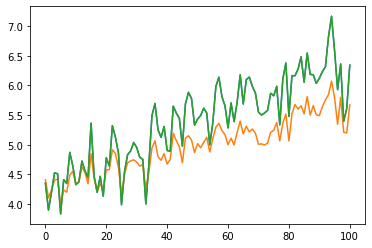

In [16]:
plt.plot(weighted_mean_2)
plt.plot(amoc_mean.values())
plt.plot(amoc_test.values())

Tester avec zone demain!!